In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
img = cv2.imread('../data/rainbow.jpg', cv2.IMREAD_GRAYSCALE)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(2,3,2)
plt.imshow(thresh1, cmap='gray')
plt.subplot(2,3,3)
plt.imshow(thresh2, cmap='gray')
plt.subplot(2,3,4)
plt.imshow(thresh3, cmap='gray')
plt.subplot(2,3,5)
plt.imshow(thresh4, cmap='gray')
plt.subplot(2,3,6)
plt.imshow(thresh5, cmap='gray')
plt.show()

In [ ]:
def show_pic(img) :
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
img = cv2.imread('../data/crossword.jpg', cv2.IMREAD_GRAYSCALE)
show_pic(img)

In [ ]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 8)
thresh3 = cv2.addWeighted(src1 = thresh1, alpha = 0.6, src2 = thresh2, beta = 0.4, gamma=0)
thresh4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
thresh5 = cv2.addWeighted(src1 = thresh1, alpha = 0.6, src2 = thresh4, beta = 0.4, gamma=0)

plt.figure(figsize=(18 ,8))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(2,3,2)
plt.imshow(thresh1, cmap='gray')
plt.subplot(2,3,3)
plt.imshow(thresh2, cmap='gray')
plt.subplot(2,3,4)
plt.imshow(thresh3, cmap='gray')
plt.subplot(2,3,5)
plt.imshow(thresh4, cmap='gray')
plt.subplot(2,3,6)
plt.imshow(thresh5, cmap='gray')
plt.show()

In [ ]:
def load_img() :
    img = cv2.imread('../data/bricks.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
def display_img(img) :
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
img = load_img()
display_img(img)
gamma = 1/4
result = np.power(img, gamma)
display_img(result)

In [ ]:
gamma = 2
result = np.power(img, gamma)
display_img(result)

In [ ]:
kernel = np.ones(shape=(5,5), dtype=np.float32) / 25
dst = cv2.filter2D(img, -1, kernel)
display_img(dst)

In [ ]:
img = load_img()
blurred = cv2.blur(img, ksize=(10,10))
blurred_gaus = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=10)
display_img(blurred_gaus)

In [ ]:
def load_img() :
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='Star Wars', org=(50,300),
                fontFace=font, fontScale=3, color=(255,255,255),
                thickness=15, lineType=cv2.LINE_AA)
    return blank_img

def display_img(img) :
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [ ]:
img = load_img()
kernel = np.ones((5,5), dtype=np.uint8)
iterations = 0
result = cv2.erode(img, kernel, iterations=iterations)
display_img(result)

In [ ]:
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600,600)) * 255
noise_img = white_noise + img
kernel = np.ones((5,5), dtype=np.uint8) 
result = cv2.dilate(noise_img, kernel)
display_img(result)

In [ ]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

In [ ]:
img = load_img()
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise = black_noise *(-img.max())
black_noise_img = black_noise + img
black_noise_img[black_noise_img == -255] = 0
black_noise_img.min()
display_img(black_noise_img)

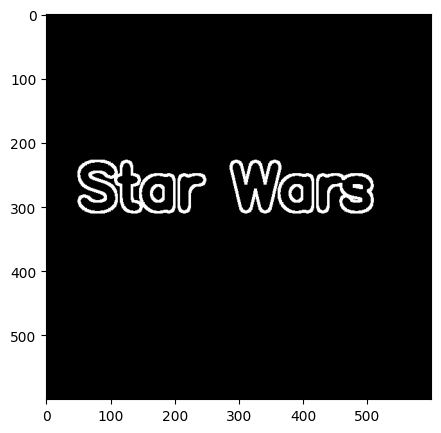

In [53]:
img = load_img()
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)